error:17977.5
merror:0.90


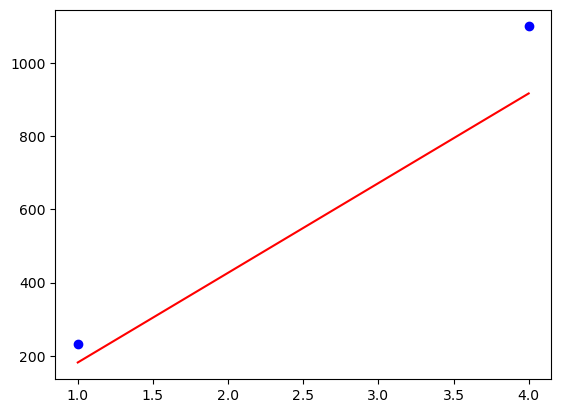

In [50]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sample_data={'Price':[231,365,498,1100,1354,1486,1818,1949,1978,2300],'Volume':[1,2,3,4,5,6,7,8,9,10]}
sample_data_df=pandas.DataFrame(sample_data)

#plt.scatter(sample_data_df['Volume'],sample_data_df['Price'])
#divide the data

X_train,X_test,Y_train,Y_test=train_test_split(sample_data_df['Volume'],sample_data_df['Price'],test_size=0.20)
# OUTPUTS ARE PANDAS SERIES
simple_linear_regression=LinearRegression()
# X_train=X_train.values
# Y_train=Y_train.values
# X_test=X_test.values
# print(type(X_train))
X_train=pandas.DataFrame(X_train)
Y_train=pandas.DataFrame(Y_train)

simple_linear_regression.fit(X_train,Y_train)
#above fit function expects dataframe or 2D np array.

Y_pred=simple_linear_regression.predict(pandas.DataFrame(X_test))

plt.scatter(X_test,Y_test,color='Blue')
plt.plot(X_test,Y_pred,color='Red')

#metrics

M_S_E=mean_squared_error(Y_test,Y_pred)
R2=r2_score(Y_test,Y_pred)
print("error:%.1f"%M_S_E)

print("merror:%.2f"%R2)
